<a href="https://colab.research.google.com/github/Hope90/user-behavior-logs-from-a-mobile-app/blob/main/user_behavior_logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploratory Data Analysis (EDA)**


* Explore the provided tables to understand the data structure and relationships
* Perform necessary data cleaning, validation and preprocessing
* Conduct descriptive analysis to identify trends and patterns in user behavior
* Generate relevant summary statistics, visualizations and insights

## 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
pd.set_option('display.max_columns', None)

## 1.2 Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset - Data Analyst.csv',sep=",")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


### Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


This dataset contains 11 columns (variable / features) and 350 rows (samples / observation / record).

*Satisfaction Level* miss two values. For EDA, I will keep these 2 rows as other variables are completed.

Dtype presents the data type of each variable, and the data type for each variable is correct.

In [5]:
df.nunique()

Customer ID                 350
Gender                        2
Age                          16
City                          6
Membership Type               3
Total Spend                  76
Items Purchased              15
Average Rating               20
Discount Applied              2
Days Since Last Purchase     54
Satisfaction Level            3
dtype: int64

Number of unique values in each column.

Customer ID is unique (mentioned in the Dataset documentation).

### Nah

In [6]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

*Satisfaction Level* column misses 2 values. (as mentioned before)

### Duplicated

In [7]:
df.duplicated().sum()

0

### Statistical Summary of Numeric Variable

In [8]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


From the statistical summary, we can have a preliminary statistical scope for each numerical variable.

From the minimum and maximum values, no anomaly were found.


### Outliers

In [9]:
cols_num = ['Age','Total Spend','Items Purchased','Average Rating','Days Since Last Purchase']

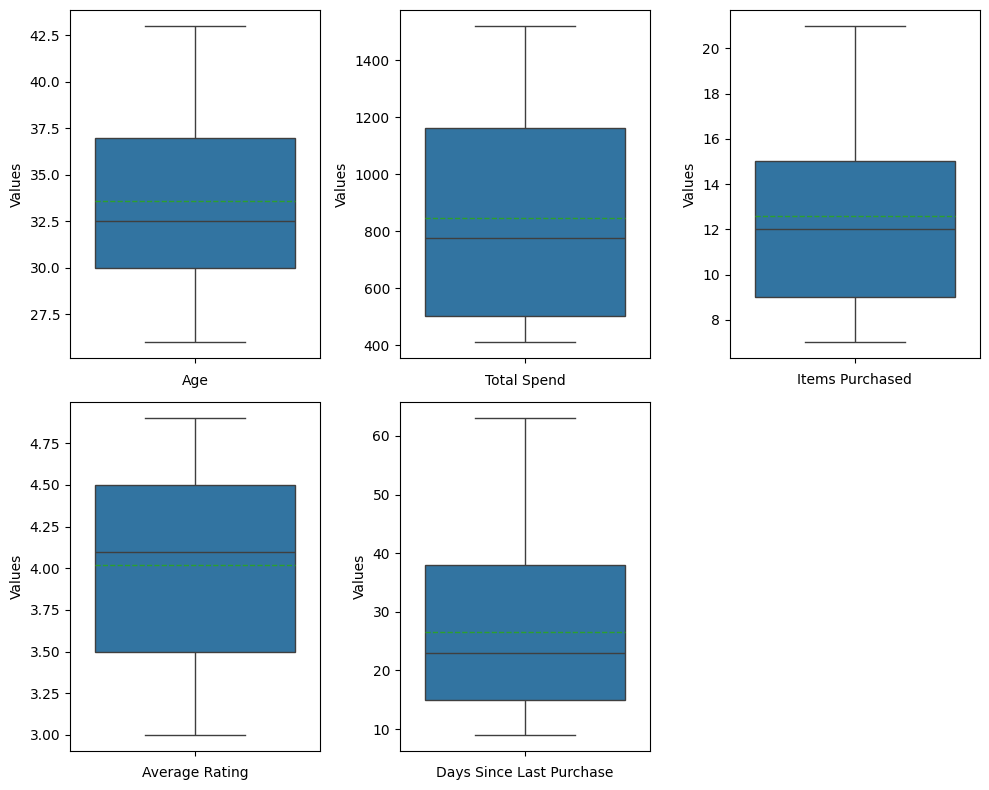

In [10]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(cols_num):
    plt.subplot(2, 3, i+1) #print in 2 rows and 3 columns
    sns.boxplot(data=df, y=col, showmeans=True, meanline=True, flierprops={'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 4}) #outlier will be marked as red color
    plt.xlabel(col)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()

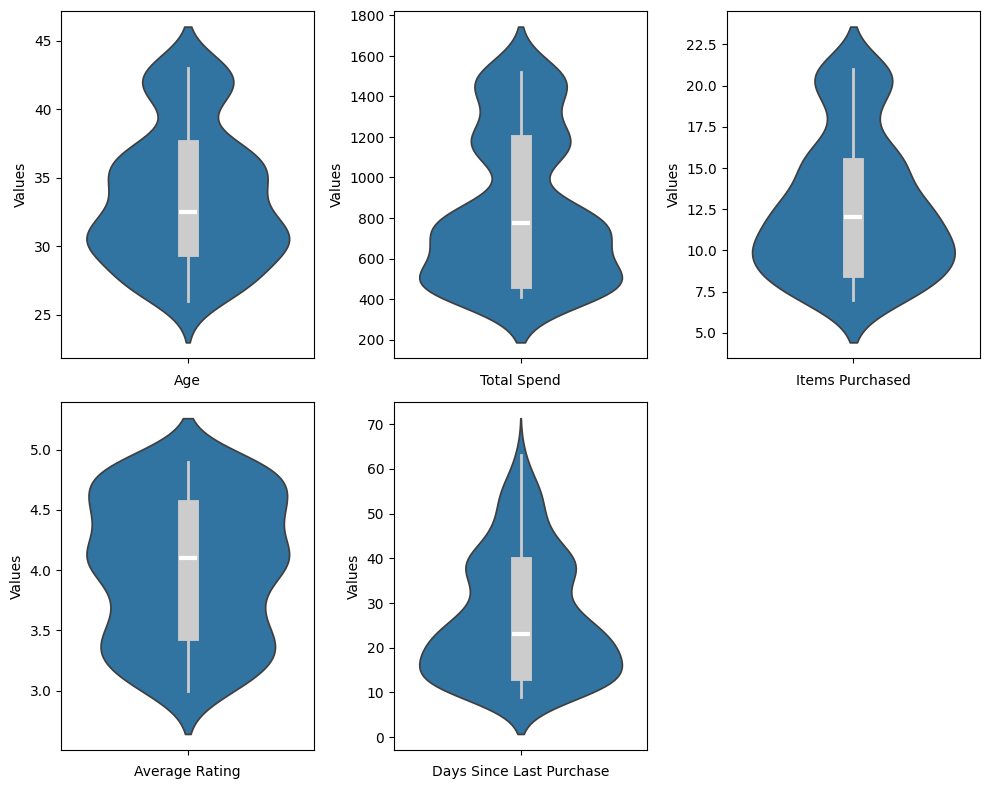

In [11]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(cols_num):
    plt.subplot(2, 3, i+1) #print in 2 rows and 3 columns
    sns.violinplot(data=df, y=col, inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    plt.xlabel(col)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()

compared to a box plot, a violin plot plays a similar role as a box-and-whisker plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution.

In [12]:
#sns.boxplot(data=df, orient="h") #The numerical ranges between variables are very different. It is not recommended to draw graphs like this.

No outliers were founded for these 5 numerical variables。

## 1.3 Univariate Analysis

In [13]:
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


### Gender

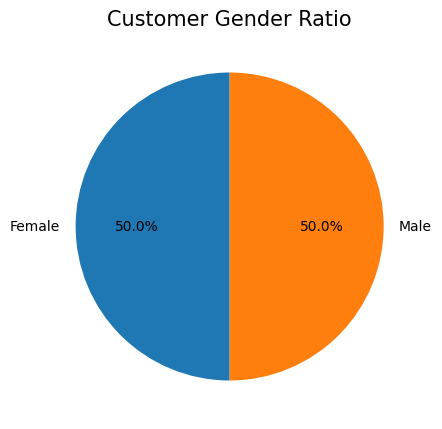

In [14]:
plt.figure(figsize=(5, 5))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 10})
plt.title("Customer Gender Ratio", fontsize = 15)
plt.show()

The gender ratio of guests is one to one (female=male=50%).

**Can consider providing more gender options to cater to different groups of customers.**

### Age

In [15]:
print("Age statistics:\n", df['Age'].describe())

Age statistics:
 count    350.000000
mean      33.597143
std        4.870882
min       26.000000
25%       30.000000
50%       32.500000
75%       37.000000
max       43.000000
Name: Age, dtype: float64


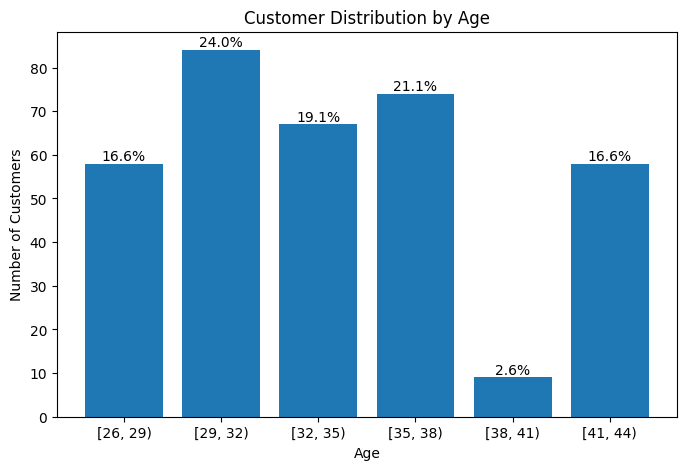

In [16]:
# Divide Age into groups
bins = range(df['Age'].min(), (df['Age'].max()+2), 3)  # age rannge in the dataset is [26,43], cut it to 3-year old as interval
#bins = np.linspace(df[].min(), df[].max(), 3)
age_groups = pd.cut(df['Age'], bins=bins, right=False)

# Count the number of customers within each group
age_counts = age_groups.value_counts().sort_index()

# Calculate the proportion of each age group in the total number of customers
total_customers = len(df)
age_percentages = (age_counts / total_customers) * 100

# Plot
plt.figure(figsize=(8, 5))

age_bars = plt.bar(age_counts.index.astype(str), age_counts.values)

for bar, percentage in zip(age_bars, age_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Age')
plt.show()

[29,31] age group has the most customers (24%), while [38,40] has the least (2.6%).

**Can investigate what products customers of each age group like to buy.**

### City

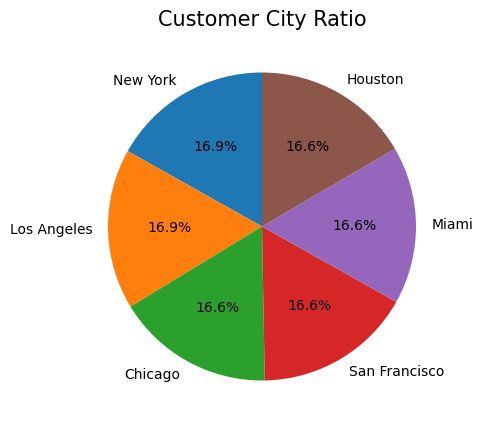

In [17]:
plt.figure(figsize=(5, 5))
plt.pie(df['City'].value_counts(),labels=df['City'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 10})
plt.title("Customer City Ratio", fontsize = 15)
plt.show()

Customers were mainly in 6 cities, and the number of customers in each city is almost the same, around 17%.

**Can investigate the consumption levels (Total Spend) and purchasing preferences of consumers in each city.**

### Membership Type

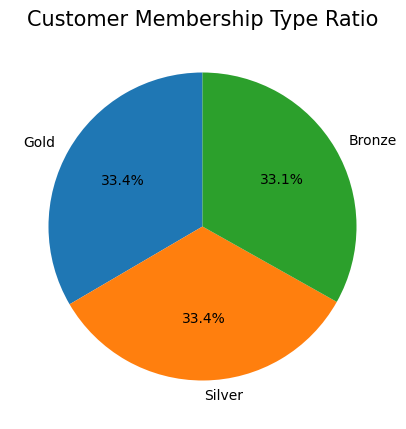

In [18]:
plt.figure(figsize=(5, 5))
plt.pie(df['Membership Type'].value_counts(),labels=df['Membership Type'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 10})
plt.title("Customer Membership Type Ratio", fontsize = 15)
plt.show()

There are 3 types of memberships, and the membership types of the customers in this dataset account for almost one third each.

**Can investigate the purchasing habits and preferences of each membership type, such as the number of returns and exchanges.**

### Total Spend

In [19]:
print("Total Spend:\n", df['Total Spend'].describe())

Total Spend:
 count     350.000000
mean      845.381714
std       362.058695
min       410.800000
25%       502.000000
50%       775.200000
75%      1160.600000
max      1520.100000
Name: Total Spend, dtype: float64


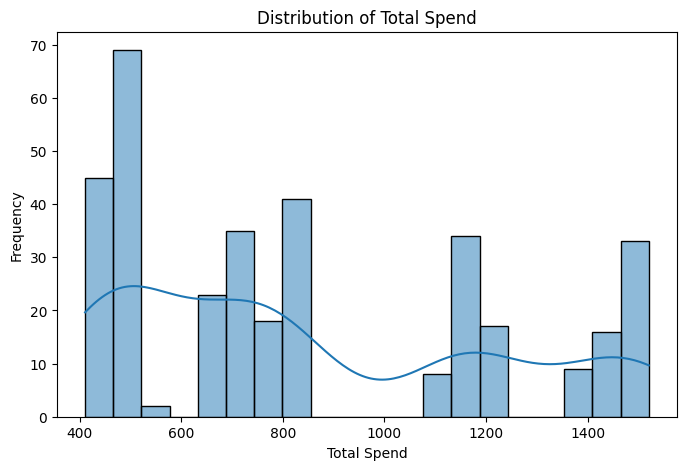

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Spend'], bins=20, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

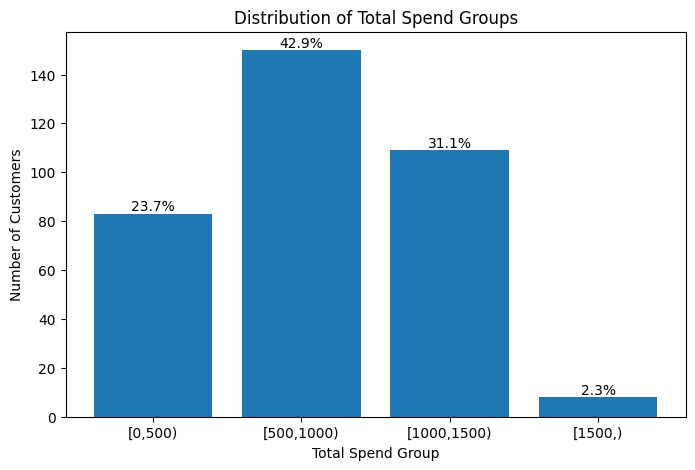

In [21]:
# Divide Total Spend into 4 groups
bins = [0, 500, 1000, 1500, float('inf')]
labels = ['[0,500)', '[500,1000)', '[1000,1500)', '[1500,)']
total_spend_groups = pd.cut(df['Total Spend'], bins=bins, labels=labels, right=False)

# Count the number within each group
total_spend_counts = total_spend_groups.value_counts().sort_index()

# Calculate the proportion of each group in the total number of customers
total_spend_percentages = (total_spend_counts / total_customers) * 100

# Plot
plt.figure(figsize=(8, 5))

ts_bars = plt.bar(total_spend_counts.index, total_spend_counts.values)

for bar, percentage in zip(ts_bars, total_spend_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Total Spend Groups')
plt.xlabel('Total Spend Group')
plt.ylabel('Number of Customers')
plt.show()

Most customers (42.9%) spent 500 to 1000 money, while few (2.3%) spent more than 1500 money.

**Can investigate the relationship between total spend and the category and quantity of purchased goods, as well as the relationship between membership types.**

### Items Purchased

In [22]:
print("Items Purchased:\n", df['Items Purchased'].describe())

Items Purchased:
 count    350.000000
mean      12.600000
std        4.155984
min        7.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       21.000000
Name: Items Purchased, dtype: float64


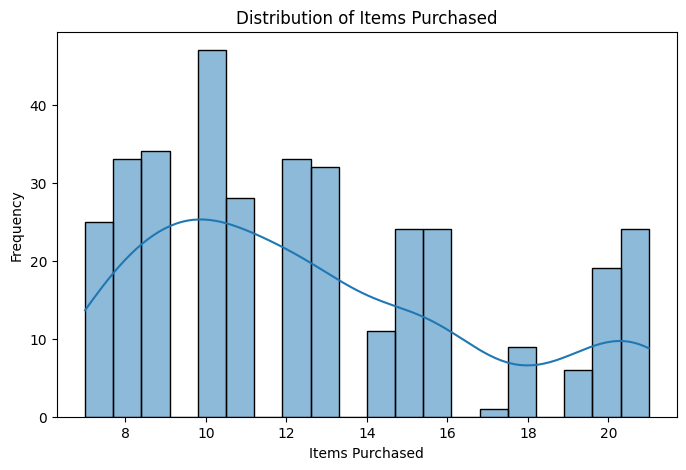

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Items Purchased'], bins=20, kde=True)
plt.title('Distribution of Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Frequency')
plt.show()

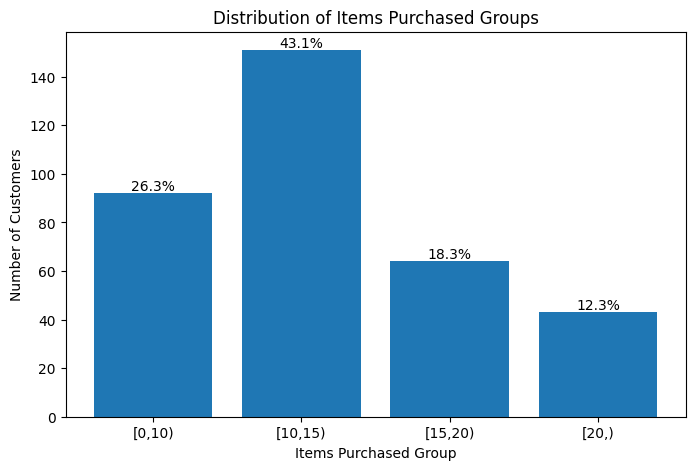

In [24]:
# Divide Items Purchased into 4 groups
bins = [0, 10, 15, 20, float('inf')]
labels = ['[0,10)', '[10,15)', '[15,20)', '[20,)']
ip_groups = pd.cut(df['Items Purchased'], bins=bins, labels=labels, right=False)

# Count the number within each age group
ip_counts = ip_groups.value_counts().sort_index()

# Calculate the proportion of each group in the total number of customers
ip_percentages = (ip_counts / total_customers) * 100

# Plot
plt.figure(figsize=(8, 5))

ip_bars = plt.bar(ip_counts.index, ip_counts.values)

for bar, percentage in zip(ip_bars, ip_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Items Purchased Groups')
plt.xlabel('Items Purchased Group')
plt.ylabel('Number of Customers')
plt.show()

Nearly half (43.1%) of customers purchased 10-14 items. Only 12.3% of customers purchased more than 20 items.

**Can investigate the relationship between purchase quantity and total spend, as well as the relationship with membership type.**


### Average Rating

In [25]:
print("Average Rating:\n", df['Average Rating'].describe())

Average Rating:
 count    350.000000
mean       4.019143
std        0.580539
min        3.000000
25%        3.500000
50%        4.100000
75%        4.500000
max        4.900000
Name: Average Rating, dtype: float64


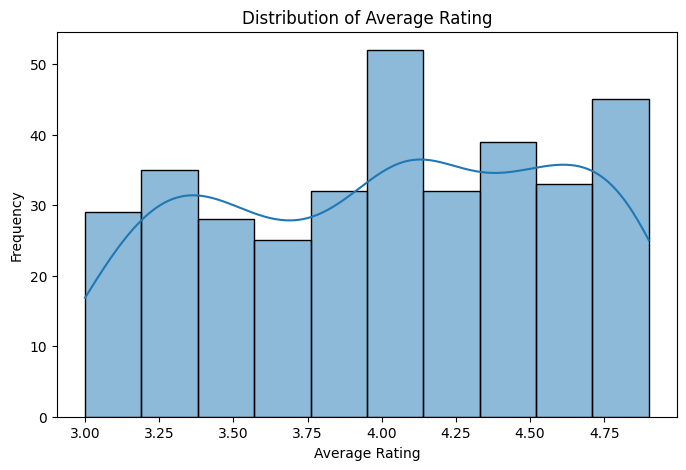

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Average Rating'], bins=10, kde=True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

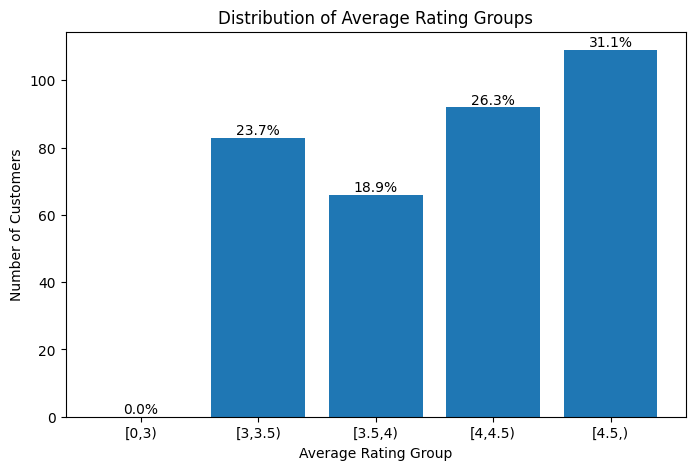

In [27]:
# Divide Average Rating into 5 groups
bins = [0, 3, 3.5, 4, 4.5, float('inf')]
labels = ['[0,3)', '[3,3.5)', '[3.5,4)', '[4,4.5)', '[4.5,)']
ar_groups = pd.cut(df['Average Rating'], bins=bins, labels=labels, right=False)

# Count the number within each age group
ar_counts = ar_groups.value_counts().sort_index()

# Calculate the proportion of each group in the total number of customers
ar_percentages = (ar_counts / total_customers) * 100

# Plot
plt.figure(figsize=(8, 5))

ar_bars = plt.bar(ar_counts.index, ar_counts.values)

for bar, percentage in zip(ar_bars, ar_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Average Rating Groups')
plt.xlabel('Average Rating Group')
plt.ylabel('Number of Customers')
plt.show()

31.1% of customers rated at least 4.5, and 26.3% of customers rated between 4 to 4.5.

**Can investigate the relationship between ratings and satisfaction, as well as products with low ratings and their causes.**

### Discount Applied

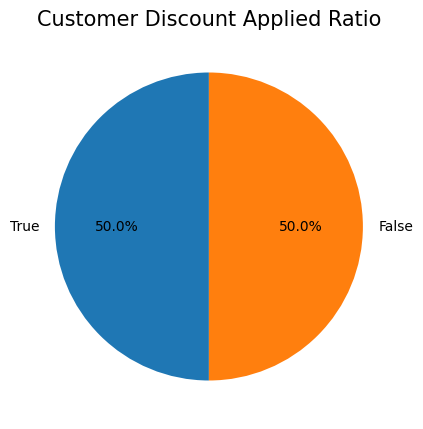

In [28]:
plt.figure(figsize=(5, 5))
plt.pie(df['Discount Applied'].value_counts(),labels=df['Discount Applied'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 10})
plt.title("Customer Discount Applied Ratio", fontsize = 15)
plt.show()

Half of the customers applied a discount while half did not.

**Can investigate the relationship between discount and consumption amount, membership type, satisfaction, etc.**

### Days Since Last Purchase

In [29]:
print("Days Since Last Purchase:\n", df['Days Since Last Purchase'].describe())

Days Since Last Purchase:
 count    350.000000
mean      26.588571
std       13.440813
min        9.000000
25%       15.000000
50%       23.000000
75%       38.000000
max       63.000000
Name: Days Since Last Purchase, dtype: float64


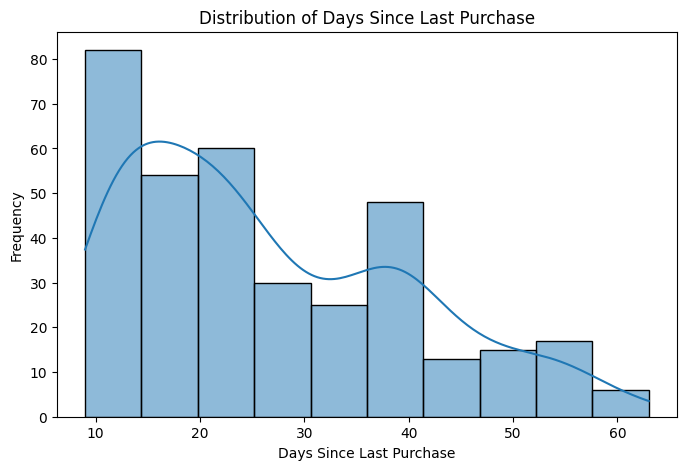

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Days Since Last Purchase'], bins=10, kde=True)
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

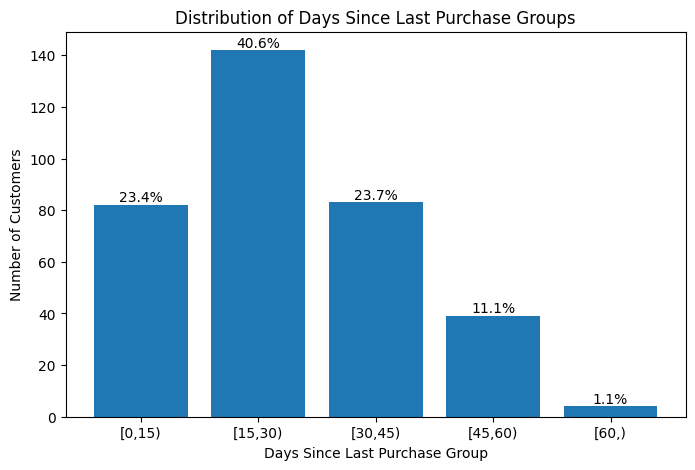

In [31]:
# Divide Days Since Last Purchase into 5 groups
bins = [0, 15, 30, 45, 60, float('inf')]
labels = ['[0,15)', '[15,30)', '[30,45)', '[45,60)', '[60,)']
lp_groups = pd.cut(df['Days Since Last Purchase'], bins=bins, labels=labels, right=False)

# Count the number within each age group
lp_counts = lp_groups.value_counts().sort_index()

# Calculate the proportion of each group in the total number of customers
lp_percentages = (lp_counts / total_customers) * 100

# Plot
plt.figure(figsize=(8, 5))

lp_bars = plt.bar(lp_counts.index, lp_counts.values)

for bar, percentage in zip(lp_bars, lp_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Days Since Last Purchase Groups')
plt.xlabel('Days Since Last Purchase Group')
plt.ylabel('Number of Customers')
plt.show()

Most customers (40.6%) last purchased 15 to 30 days ago.

**Can analyze the retention rate and the reasons for user retention, evaluate the effectiveness of marketing activities, discover the reasons for user loss, and propose improvement measures.**

### Satisfaction Level

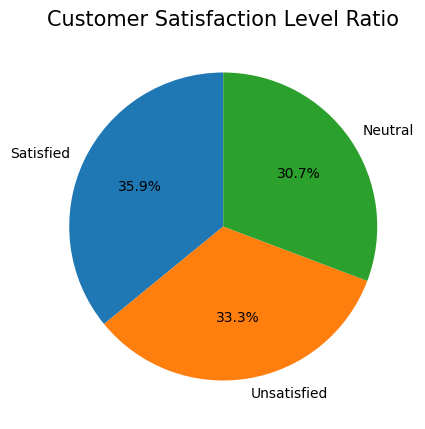

In [32]:
plt.figure(figsize=(5, 5))
plt.pie(df['Satisfaction Level'].value_counts(),labels=df['Satisfaction Level'].value_counts().index,autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 10})
plt.title("Customer Satisfaction Level Ratio", fontsize = 15)
plt.show()

35.9% of customers were satisfied with their experience， while 33.3% were not.

**Satisfaction Level might need to be improved by investigating the reasons why only 36% of customers were satisfied.**

## 1.4 Multivariate Analysis

### Correlation

<ipython-input-33-9b4f506ea560>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


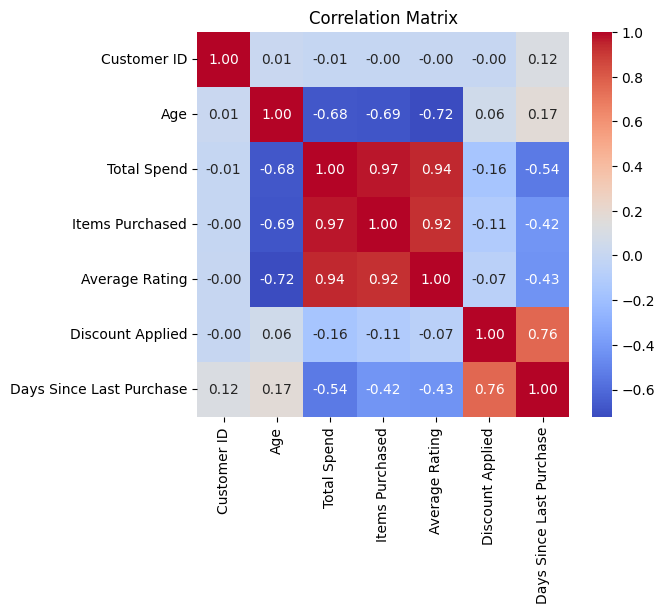

In [33]:
# Calculate the correlation coefficient between features
correlation_matrix = df.corr()

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Strong correlation (|correlation coefficient|>0.7) were found between:

* Age: Total Spend, Items Purchased, Average Rating.
* Total Spending: Age, Item Purchased, Average Rating.
* Item Purchased: Age, Total Spending, Average Rating.
* Average Rating: Age, Total Spending, Item Purchased.
* Discount Applied: Days Since Last Puchase
* Days Since Last Puchase: Discount Applied.  


### Gender VS Age

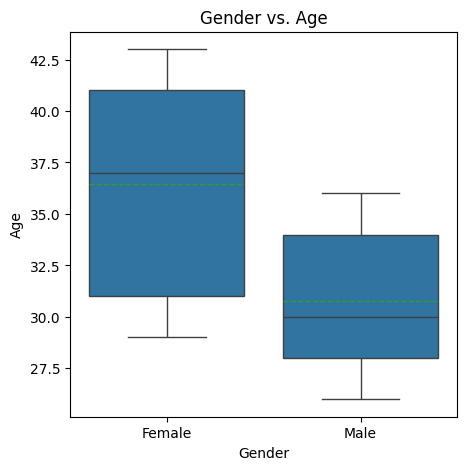

In [34]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Gender', y='Age', showmeans=True, meanline=True)
plt.title('Gender vs. Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The average age of female consumers is older than that of male consumers.

### Gender VS Total Spend

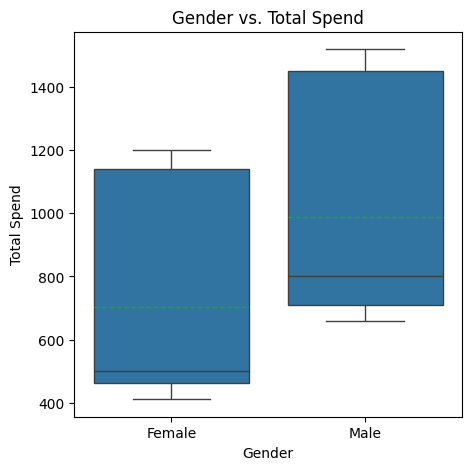

In [35]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Gender', y='Total Spend', showmeans=True, meanline=True)
plt.title('Gender vs. Total Spend')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.show()

The average Total Spend of men is higher than that of women. It may mean that men are more active in consumption or more willing to spend money.

**Can adjust marketing channels and promotion methods, choose more suitable channels according to gender characteristics, and improve marketing efficiency and conversion rate.**

### Gender VS Average Rating

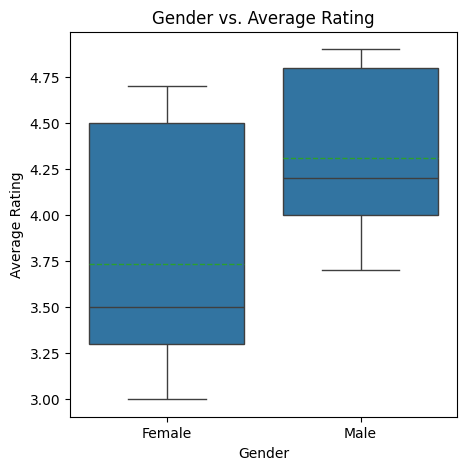

In [36]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Gender', y='Average Rating', showmeans=True, meanline=True)
plt.title('Gender vs. Average Rating')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

Male customers gave higher ratings on average.

### Gender VS Discount Applied

<Figure size 500x500 with 0 Axes>

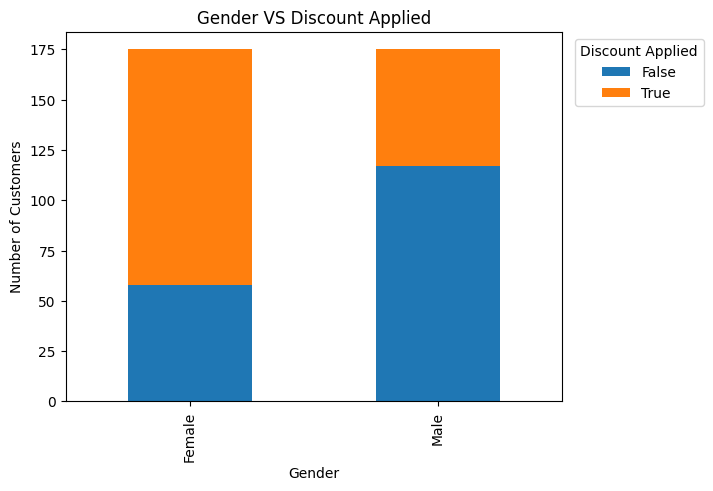

In [37]:
plt.figure(figsize=(5, 5))
df.groupby(['Gender', 'Discount Applied']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.title('Gender VS Discount Applied')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Discount Applied', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Female customers liked to apply discount better than male customers.

### Age VS Total Spend by Membership Type

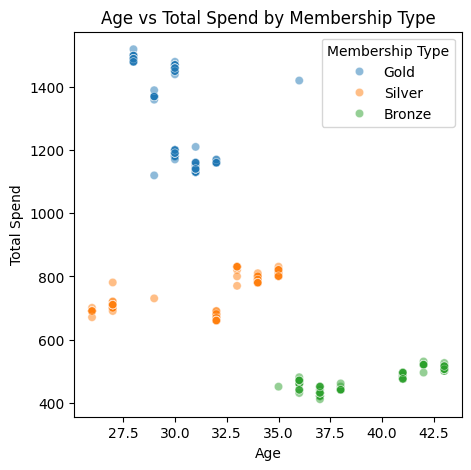

Pearson correlation coefficient: -0.6779183145807021
P-value: 1.9698124224807767e-48


In [38]:
# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Age', y='Total Spend', hue='Membership Type', alpha=0.5)
plt.title('Age vs Total Spend by Membership Type')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.legend(title='Membership Type')
plt.show()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Age'], df['Total Spend'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Age and Total Spending, these two variables are not independent. They showed a negative correlation.

Younger customers might spend more with a Gold Membership Type.

### Age VS Average Rating by Membership Type

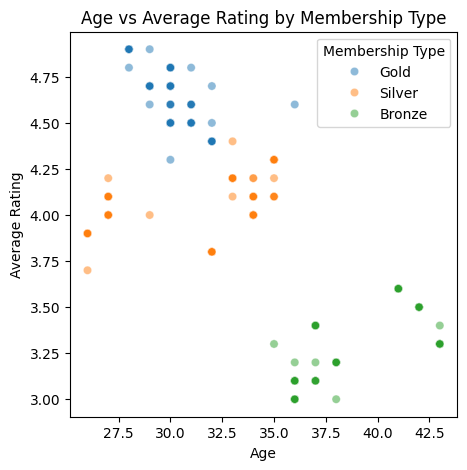

Pearson correlation coefficient: -0.7222774725110899
P-value: 1.0997146895174398e-57


In [39]:
# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Age', y='Average Rating', hue='Membership Type', alpha=0.5)
plt.title('Age vs Average Rating by Membership Type')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.legend(title='Membership Type')
plt.show()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Age'], df['Average Rating'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Age and Average Rating, these two variables are not independent. They showed a negative correlation.

Younger customers might rated higher with a Gold Membership Type.

### Total Spend VS Membership Type

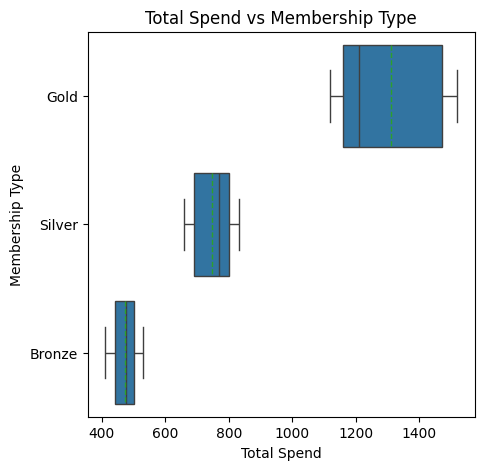

In [40]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Total Spend', y='Membership Type', showmeans=True, meanline=True)
plt.title('Total Spend vs Membership Type')
plt.xlabel('Total Spend')
plt.ylabel('Membership Type')
plt.show()

Membership Type showed a good relationship with Total Spend. In other words, Total Spend determines the level of Membership.

### Total Spend VS Items Purchased by City

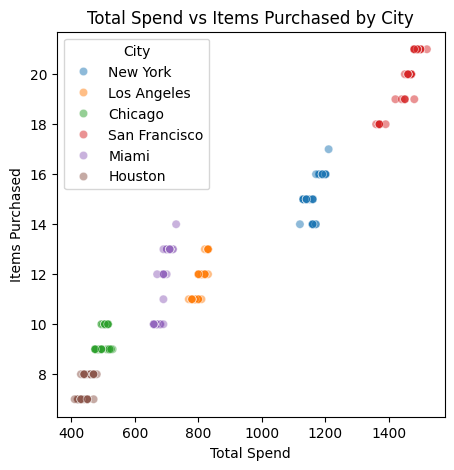

Pearson correlation coefficient: 0.9724247945494608
P-value: 4.2000420322681194e-222


In [41]:
# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Total Spend', y='Items Purchased', hue='City', alpha=0.5)
plt.title('Total Spend vs Items Purchased by City')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.legend(title='City')
plt.show()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Total Spend'], df['Items Purchased'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

There was a strong positive correlation between Total Spend and Items Purchased.

And customers from San Francisco and New York spent more money and purchased more items, while the customers from Houston and Chicago showed the opposite.

### Total Spend VS Average Rating by City

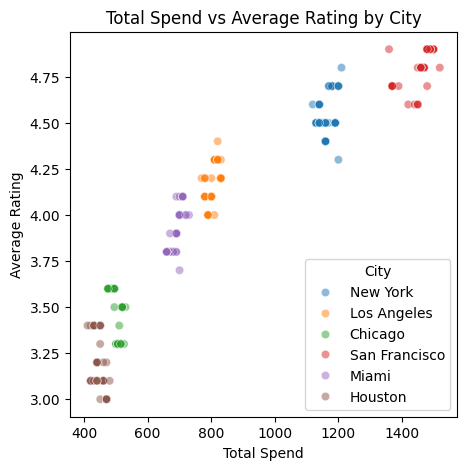

Pearson correlation coefficient: 0.941474725332894
P-value: 2.0396514636651946e-166


In [42]:
# Plot
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Total Spend', y='Average Rating', hue='City', alpha=0.5)
plt.title('Total Spend vs Average Rating by City')
plt.xlabel('Total Spend')
plt.ylabel('Average Rating')
plt.legend(title='City')
plt.show()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Total Spend'], df['Average Rating'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

There was a strong positive correlation between Total Spend and Average Rating.

And customers from San Francisco and New York spent more money and gave higher rating, while the customers from Houston and Chicago showed the opposite.

### Average Rating VS Satisfaction Level

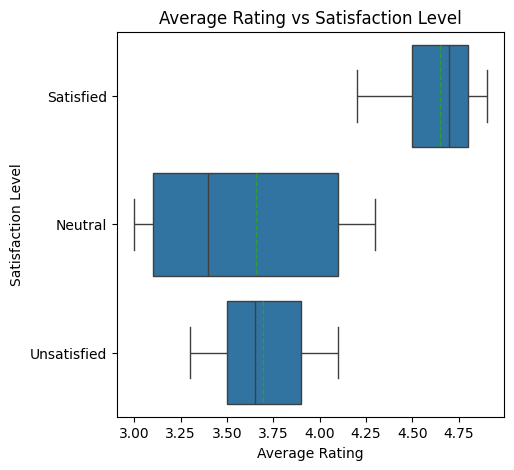

In [43]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Average Rating', y='Satisfaction Level', showmeans=True, meanline=True)
plt.title('Average Rating vs Satisfaction Level')
plt.xlabel('Average Rating')
plt.ylabel('Satisfaction Level')
plt.show()

When the Average Rating was high, the Satisfaction Level was "Saftisfied".

However, Average Rating might not have a strong relationship with "Neutral" and "Unsatisfied" as suggested by their mean and median values.

###  Discount Applied VS Days Since Last Puchase

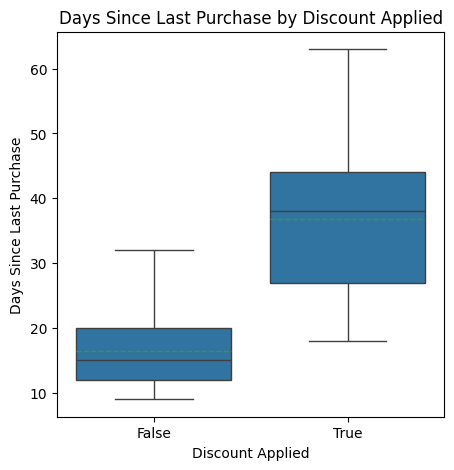

In [44]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Discount Applied', y='Days Since Last Purchase', showmeans=True, meanline=True)
plt.title('Days Since Last Purchase by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Days Since Last Purchase')
plt.show()

Customers who applied discounts showed a longer days since their last purchase. This may indicate that this group of customers is more inclined to wait until there is a discount before purchasing.

### Days Since Last Purchase VS Total Spend

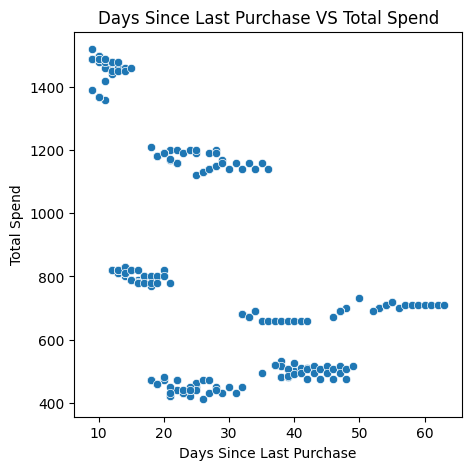

Pearson correlation coefficient: -0.5400890652950378
P-value: 6.817354890565049e-28


In [45]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Days Since Last Purchase', y='Total Spend')
plt.title('Days Since Last Purchase VS Total Spend')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Spend')
plt.show()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Days Since Last Purchase'], df['Total Spend'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Days Since Last Purchase is negatively related to Total Spend. Consumers who had logged in more recently might have higher total spend.

Can test power function.

# **2.Metrics and KPI Recommendations**

Here list 5 KPI for understanding user engagement and app performance:

* Daily Active Users (DAU)

* User Retention Rate

* Average Session Duration

* User Conversion Rate

* Average Revenue Per User (ARPU)

## 2.1 Daily Active Users (DAU)

**Rationale**: DAU measures the number of unique users who engage with the app on a daily basis. A high DAU indicates strong user engagement and frequent usage of the app.

**Business Value**: Monitoring DAU helps in understanding the daily usage patterns of the app, identifying trends, and assessing the effectiveness of features or updates rolled out. It also serves as a key metric for advertisers and investors to gauge the app's popularity and potential for revenue generation.

In [46]:
df['Days Since Last Purchase'].min()

9

In [47]:
df_dau_9 = df[df['Days Since Last Purchase']==9]
dau_9 = df_dau_9['Customer ID'].nunique()
dau_9

9

Since this dataset lacks a time series column, I can only use the following method to roughly show the calculation method.

The last purchase date in the dataset was nine days ago. So here I calculate DAU from nine days ago, which was 9 customers.

## 2.2 User Retention Rate

**Rationale**: User retention rate calculates the percentage of users who continue to use the app over a specific time period. A high retention rate indicates that the app effectively retains users and keeps them engaged over time.

**Business Value**: High user retention is critical for sustaining growth and ensuring long-term success. It reflects user satisfaction, loyalty, and the app's ability to deliver value consistently. By improving retention rates, businesses can reduce customer acquisition costs and maximize lifetime customer value.

In [48]:
# This dataset does not provide enough info to calculate this KPI.
# Here I assume that all data needed were contained in the dataset.
# Therefore, the User Rentention Rate for Feb-2024 can be calculted as:

# previous_start_date = '2024-01-01'
# previous_end_date = '2024-01-31'
# df_previous_period = df[(df['Timestamp'] >= previous_start_date) & (df['Timestamp'] <= previous_end_date)]


# current_start_date = '2024-02-01'
# current_end_date = '2024-02-29'
# df_current_period = df[(df['Timestamp'] >= current_start_date) & (df['Timestamp'] <= current_end_date)]

# previous_period_active_users = df_previous_period['Customer ID'].nunique()
# current_period_active_users = df_current_period['Customer ID'].nunique()
# new_users = df_current_period['Customer ID'].nunique() - df_previous_period['Customer ID'].nunique()
# user_retention_rate = ((current_period_active_users - new_users) / previous_period_active_users) * 100

## 2.3 Average Session Duration

**Rationale**: Average session duration measures the average amount of time users spend within the app during each session. It reflects user engagement levels and the quality of the user experience.

**Business Value**: A longer average session duration indicates that users find the app engaging and valuable, spending more time interacting with its features. Monitoring this metric helps identify areas for improvement in user experience and content, leading to increased user satisfaction and retention.

In [49]:
# This dataset does not provide enough info to calculate this KPI.
# Here I assume that all data needed were contained in the dataset.
# Therefore, the Average Session Duration can be calculted as:

# df['Session Duration'] = (df['Session End Time'] - df['Session Start Time']).dt.total_seconds()
# average_session_duration = df['Session Duration'].mean()

## 2.4 User Conversion Rate

**Rationale**: User conversion rate tracks the percentage of users who complete a desired action within the app, such as making a purchase, signing up for a subscription, or completing a tutorial.

**Business Value**: A high conversion rate signifies that the app effectively guides users through the desired actions, leading to increased revenue and business success. By analyzing and optimizing conversion funnels, businesses can identify barriers to conversion and implement strategies to improve user engagement and conversion rates.

In [50]:
# This dataset does not provide enough info to calculate this KPI.
# Here I assume that all data needed were contained in the dataset.
# Therefore, the User Conversion Rate can be calculted as:

# Assume that the number of users who completed a goal had been calculated in df_completed_users.

# total_users = df['Customer ID'].nunique()
# completed_users = df_completed_users['Customer ID'].nunique()
# user_conversion_rate = (completed_users / total_users) * 100

# If "making a purchase" is a goal for the study, then the user_conversion_rate is 100% for the period of time of the given dataset.

## 2.5 Average Revenue Per User (ARPU)

**Rationale**: ARPU measures the average revenue generated from each user over a specific period, typically calculated by dividing total revenue by the total number of active users.

**Business Value**: ARPU provides insights into the app's monetization effectiveness and the value generated from each user. It helps businesses understand the profitability of different user segments, optimize pricing strategies, and identify opportunities for revenue growth. Increasing ARPU can lead to higher overall revenue and improved business performance.

In [51]:
total_revenue = df['Total Spend'].sum()
arpu = total_revenue / df['Customer ID'].count()
arpu

845.3817142857142

# **3.Predictive Modeling**

Based on the provided dataset, I formulated a related prediction problem, which was predicting the user's total spending (Total Spend).

This is an important prediction problem because understanding customers' consumption behavior can help companies develop more effective marketing strategies and increase revenue.

* **Prediction Problem**:

Predict the customer's total spending (Total Spend)

* **Model Selection**:

Since the prediction problem is a continuous regression problem, I chose the linear regression model as a simple baseline model.

In addition to linear regression models, other regression models, such as ridge regression, decision tree regression, etc., can also be tested in the future to compare the simulation effects of different models.

* **Model Training and Evaluation**:

Divide the dataset into a training set and a test set.
70% of the data is used for training, and 30% for testing.


Use the training set to train the model, and use the test set to evaluate the performance of the model.

Evaluation indicators such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), etc., can be used to evaluate the predictive performance of the model.

## 3.1 Dataset Preparation

In [52]:
data = df.dropna(axis=0, how='any')
# Previous exploration has found that Satisfaction Level column misses 2 value (rows).
# Therefore, here I deleted these 2 rows.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [54]:
data.set_index('Customer ID', inplace=True)

## 3.2 Feature Engineering

### Categorical Features

In the dataset, the following features are categorical：

Gender, City, Membership Type, Discount Applied, Satisfaction Level


I would delete Membership Type this feature for Modeling as it is determined by the Total Spend. In other words, it is the result of Total Spend, not the variable that affects Total Spend.

In [55]:
cat_cols = ['Gender', 'City', 'Discount Applied', 'Satisfaction Level']

In [56]:
data_encoded = pd.get_dummies(data, columns=cat_cols)
data_encoded

,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
Customer ID,,,,,,,,,,,,,,,,,,,
101,29,Gold,1120.20,14,4.6,25,1,0,0,0,0,0,1,0,0,1,0,1,0
102,34,Silver,780.50,11,4.1,18,0,1,0,0,1,0,0,0,1,0,1,0,0
103,43,Bronze,510.75,9,3.4,42,1,0,1,0,0,0,0,0,0,1,0,0,1
104,30,Gold,1480.30,19,4.7,12,0,1,0,0,0,0,0,1,1,0,0,1,0
105,27,Silver,720.40,13,4.0,55,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,32,Silver,660.30,10,3.8,42,0,1,0,0,0,1,0,0,0,1,0,0,1
447,36,Bronze,470.50,8,3.0,27,1,0,0,1,0,0,0,0,1,0,1,0,0
448,30,Gold,1190.80,16,4.5,28,1,0,0,0,0,0,1,0,0,1,0,1,0


In [57]:
# delete the Membership Type column
data_encoded.drop(columns=['Membership Type'], inplace=True)
data_encoded

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
Customer ID,,,,,,,,,,,,,,,,,,
101,29,1120.20,14,4.6,25,1,0,0,0,0,0,1,0,0,1,0,1,0
102,34,780.50,11,4.1,18,0,1,0,0,1,0,0,0,1,0,1,0,0
103,43,510.75,9,3.4,42,1,0,1,0,0,0,0,0,0,1,0,0,1
104,30,1480.30,19,4.7,12,0,1,0,0,0,0,0,1,1,0,0,1,0
105,27,720.40,13,4.0,55,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,32,660.30,10,3.8,42,0,1,0,0,0,1,0,0,0,1,0,0,1
447,36,470.50,8,3.0,27,1,0,0,1,0,0,0,0,1,0,1,0,0
448,30,1190.80,16,4.5,28,1,0,0,0,0,0,1,0,0,1,0,1,0


In [58]:
X= data_encoded.drop(columns=['Total Spend'])
X

,Age,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
Customer ID,,,,,,,,,,,,,,,,,
101,29,14,4.6,25,1,0,0,0,0,0,1,0,0,1,0,1,0
102,34,11,4.1,18,0,1,0,0,1,0,0,0,1,0,1,0,0
103,43,9,3.4,42,1,0,1,0,0,0,0,0,0,1,0,0,1
104,30,19,4.7,12,0,1,0,0,0,0,0,1,1,0,0,1,0
105,27,13,4.0,55,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,32,10,3.8,42,0,1,0,0,0,1,0,0,0,1,0,0,1
447,36,8,3.0,27,1,0,0,1,0,0,0,0,1,0,1,0,0
448,30,16,4.5,28,1,0,0,0,0,0,1,0,0,1,0,1,0


In [59]:
target = ['Total Spend']
Y = data_encoded[target]
Y

,Total Spend
Customer ID,
101,1120.20
102,780.50
103,510.75
104,1480.30
105,720.40
...,...
446,660.30
447,470.50
448,1190.80


### Split Dataset

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print(f'X_train is in shape of {X_train.shape}')
print(f'X_test is in shape of {X_test.shape}')
print(f'Y_train is in shape of {Y_train.shape}')
print(f'Y_test is in shape of {Y_test.shape}')

X_train is in shape of (243, 17)
X_test is in shape of (105, 17)
Y_train is in shape of (243, 1)
Y_test is in shape of (105, 1)


### Standardization

In [62]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

Y_train_ss = ss.fit_transform(np.array(Y_train).reshape(-1, 1))
Y_test_ss = ss.fit_transform(np.array(Y_test).reshape(-1, 1))

## 3.3 Modeling: Linear Regression

In [64]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold

In [65]:
model = LinearRegression()

In [66]:
np.random.seed(5)
cv_train = KFold(n_splits = 5, shuffle = True, random_state = 45)
score = ('r2', 'neg_mean_absolute_error')
params = {'fit_intercept': [True, False]}

In [67]:
lr_gridsearch = GridSearchCV(model,
                  param_grid=params,
                  scoring = score,
                  verbose = 2,
                  cv = cv_train,
                  refit = 'neg_mean_absolute_error',
                  return_train_score = True,
                  n_jobs = -1
                 )

In [68]:
lr_gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=('r2', 'neg_mean_absolute_error'), verbose=2)

In [69]:
best_params = lr_gridsearch.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'fit_intercept': False}


In [70]:
lr_gridsearch.cv_results_

{'mean_fit_time': array([0.01558862, 0.01434383]),
 'std_fit_time': array([0.00629033, 0.00460046]),
 'mean_score_time': array([0.01393504, 0.0085331 ]),
 'std_score_time': array([0.00587184, 0.00530731]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_r2': array([0.99813678, 0.99813678]),
 'split1_test_r2': array([0.99819665, 0.99819665]),
 'split2_test_r2': array([0.99300328, 0.99300328]),
 'split3_test_r2': array([0.99904917, 0.99904917]),
 'split4_test_r2': array([0.99835747, 0.99835747]),
 'mean_test_r2': array([0.99734867, 0.99734867]),
 'std_test_r2': array([0.00219691, 0.00219691]),
 'rank_test_r2': array([1, 1], dtype=int32),
 'split0_train_r2': array([0.99859964, 0.99859964]),
 'split1_train_r2': array([0.99857806, 0.99857806]),
 'split2_train_r2': array([0.99862441, 0.99862441]),
 'split3_train_r2': arr

In [71]:
best_model = lr_gridsearch.best_estimator_

In [72]:
Y_train_lr = best_model.predict(X_train)

In [73]:
Y_pred_lr = best_model.predict(X_test)

In [74]:
test_score = best_model.score(X_test, Y_test)

In [75]:
coefficients = best_model.coef_
print(coefficients)

[[   2.44347532   25.94404768    1.66608584   -1.43626921  161.19257381
   150.79135872 -105.2752828  -279.7713554   -21.93711003   74.09089566
   213.13092487  431.74586023  130.0373948   181.94653773  177.37805286
   165.7902668   -31.18438714]]


In [76]:
print("Best Model Test Score:", test_score)

Best Model Test Score: 0.9980671255724352


## 3.4 Evaluation

In [77]:
from sklearn import metrics

In [78]:
# evaluation of training modeling
mse_lr_train = metrics.mean_squared_error(Y_train,Y_train_lr)
r2_lr_train = metrics.r2_score(Y_train,Y_train_lr)
mae_lr_train = metrics.mean_absolute_error(Y_train,Y_train_lr)
print("RMSE_train=", mse_lr_train**(1/2), "R2_train=", r2_lr_train, "MAE_train=", mae_lr_train)

RMSE_train= 13.750898075611008 R2_train= 0.9985384529696935 MAE_train= 10.336878449405676


In [79]:
# evaluation of testing modeling
mse_lr = metrics.mean_squared_error(Y_test,Y_pred_lr)
r2_lr = metrics.r2_score(Y_test,Y_pred_lr)
mae_lr = metrics.mean_absolute_error(Y_test,Y_pred_lr)
print("RMSE=", mse_lr**(1/2), "R2=", r2_lr, "MAE=", mae_lr)

RMSE= 15.938436379462525 R2= 0.9980671255724352 MAE= 12.354083184984729


This model provides good fit.


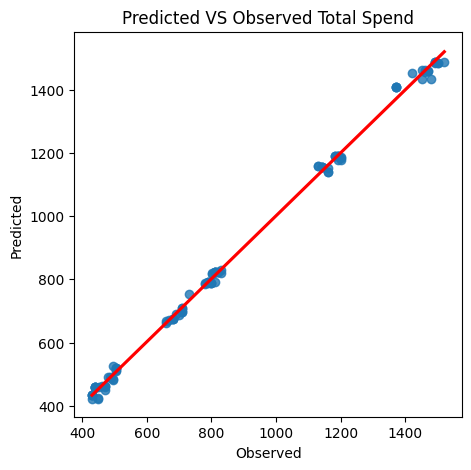

In [80]:
plt.figure(figsize=(5, 5))
sns.regplot(x=Y_test[target], y=Y_pred_lr[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed Total Spend")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

# **4.Summary and Recommendations**

## 4.1 Summary of Key Findings



Through exploratory data analysis (EDA), it was found that **Gender, Age, City** can influence user behavior on Total Spend.
Users of different Gender, Age, City groups exhibit distinct patterns and preferences within the application. It can adjust such as marketing channels, product categories, and promotion methods according to Gender, Age, City characteristics, and improve marketing efficiency and conversion rate.

For example:
* Improve the products (category, quality) for female customer.
* Drive consumption among customers over 35 years old
* Develop the market of customers aged 30-41 years old
* Increase marketing in Houston and Chicago markets
* Increase promotion frequency inoder to stimulate consumption

The Linear Regression model provides good simulations for Total Spend, which can be used in future.

## 4.2 Recommendations

**Further Model Development and Optimization**:
* Add the features (variables) required in key KPIs, such as time related data, transaction history.
* Optimize the existing predictive model to improve prediction accuracy and generalization ability, enabling better understanding of user behavior and prediction of user needs.
* Test other models and compare results and model performance.
* Apply Machine Learning for different targets.

**Conduct In-depth Market Research**:
* Carry out user surveys and market analysis to understand user preferences and demands, uncovering potential market opportunities.
* Collect additional data on user behavior and preferences to support more comprehensive analysis and decision-making.